<a href="https://colab.research.google.com/github/shivangisehgal/pcos-diagnosis/blob/main/Diagnosis_of_Polycystic_Ovarian_Syndrome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


## Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

## Loading Dataset

In [ ]:
data_infer = pd.read_csv('/drive/My Drive/PCOS/PCOS_infertility.csv')
data_woinfer = pd.read_excel('/drive/My Drive/PCOS/PCOS_data_without_infertility.xlsx', sheet_name = "Full_new")

In [ ]:
data_infer.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [ ]:
data_woinfer.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,5,7.0,0,0,1.99,1.99,7.95,3.68,2.160326,36,30,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,5,11.0,1,0,60.80,1.99,6.73,1.09,6.174312,38,32,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,5,10.0,1,0,494.08,494.08,5.54,0.88,6.295455,40,36,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,5,4.0,0,0,1.99,1.99,8.06,2.36,3.415254,42,36,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,5,1.0,1,0,801.45,801.45,3.98,0.90,4.422222,37,30,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


## Data Preprocessing

In [ ]:
data_woinfer.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [ ]:
#Merging both data on the basis of Patient File No
data = pd.merge(data_woinfer, data_infer, on = 'Patient File No.', suffixes = {'','_without'},how = 'left')
#Dropping repeated columns
data = data.drop(['Unnamed: 44', 'Sl. No_without', 'PCOS (Y/N)_without', '  I   beta-HCG(mIU/mL)_without','II    beta-HCG(mIU/mL)_without', 'AMH(ng/mL)_without'], axis=1)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing 'suffixes' as a <class 'set'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,5,7.0,0,0,1.99,1.99,7.95,3.68,2.160326,36,30,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,5,11.0,1,0,60.80,1.99,6.73,1.09,6.174312,38,32,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,5,10.0,1,0,494.08,494.08,5.54,0.88,6.295455,40,36,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,5,4.0,0,0,1.99,1.99,8.06,2.36,3.415254,42,36,0.857143,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,5,1.0,1,0,801.45,801.45,3.98,0.90,4.422222,37,30,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [ ]:
data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.00000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,2.560074,4.94085,7.680926,0.380776,0.288355,664.549235,14.601832,6.469919,6.904831,37.992606,33.841035,0.891895,2.981281,24.321497,49.915874,0.610945,99.835860,0.377079,0.273567,0.306839,0.452865,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,0.901950,1.49202,4.803835,0.486027,0.692575,3348.920576,217.022081,86.673255,60.691822,3.967920,3.596894,0.046326,3.755532,14.970391,346.206599,3.808853,18.559298,0.485104,0.446202,0.461609,0.498234,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,0.00000,0.000000,0.000000,0.000000,1.300000,0.210000,0.020000,0.002146,26.000000,24.000000,0.755556,0.040000,0.400000,0.000000,0.047000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,2.000000,4.00000,4.000000,0.000000,0.000000,1.990000,3.300000,1.020000,1.416244,36.000000,32.000000,0.857143,1.480000,14.520000,20.800000,0.250000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,5.00000,7.000000,0.000000,0.000000,20.000000,4.850000,2.300000,2.169231,38.000000,34.000000,0.894737,2.260000,21.920000,25.900000,0.320000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,4.000000,5.00000,10.000000,1.000000,0.000000,297.210000,6.410000,3.680000,3.959184,40.000000,36.000000,0.928571,3.570000,29.890000,34.500000,0.450000,107.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,12.00000,30.000000,1.000000,5.000000,32460.970000,5052.000000,2018.000000,1372.826087,48.000000,47.000000,0.979167,65.000000,128.240000,6014.660000,85.000000,350.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [ ]:
data.isnull().sum()

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [ ]:
data['II    beta-HCG(mIU/mL)'].head()

0      1.99
1      1.99
2    494.08
3      1.99
4    801.45
Name: II    beta-HCG(mIU/mL), dtype: object

In [ ]:
data["AMH(ng/mL)"].head() 

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: object

In [ ]:
#Converting object datatype into numeric value.
data['II    beta-HCG(mIU/mL)'] = pd.to_numeric(data['II    beta-HCG(mIU/mL)'], errors='coerce')
data['AMH(ng/mL)'] = pd.to_numeric(data['AMH(ng/mL)'], errors='coerce')

###Filling Missing Values

In [ ]:
data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace = True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace = True)

In [ ]:
data.columns[data.isnull().any()]

Index(['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)'], dtype='object')

In [ ]:
data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(), inplace = True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(), inplace = True)

In [ ]:
#data.columns[data.isnull().any()]

In [ ]:
data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.00000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,11.160037,2.560074,4.94085,7.679667,0.380776,0.288355,664.549235,238.232993,14.601832,6.469919,6.904831,37.992606,33.841035,0.891895,2.981281,5.620634,24.321497,49.915874,0.610945,99.835860,0.377079,0.273567,0.306839,0.452865,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,0.866904,0.901950,1.49202,4.799475,0.486027,0.692575,3348.920576,1603.825706,217.022081,86.673255,60.691822,3.967920,3.596894,0.046326,3.755532,5.876742,14.970391,346.206599,3.808853,18.559298,0.485104,0.446202,0.461609,0.498234,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,8.500000,2.000000,0.00000,0.000000,0.000000,0.000000,1.300000,0.990000,0.210000,0.020000,0.002146,26.000000,24.000000,0.755556,0.040000,0.100000,0.400000,0.000000,0.047000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,10.500000,2.000000,4.00000,4.000000,0.000000,0.000000,1.990000,1.990000,3.300000,1.020000,1.416244,36.000000,32.000000,0.857143,1.480000,2.010000,14.520000,20.800000,0.250000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,11.000000,2.000000,5.00000,7.000000,0.000000,0.000000,20.000000,1.990000,4.850000,2.300000,2.169231,38.000000,34.000000,0.894737,2.260000,3.700000,21.920000,25.900000,0.320000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,11.700000,4.000000,5.00000,10.000000,1.000000,0.000000,297.210000,97.630000,6.410000,3.680000,3.959184,40.000000,36.000000,0.928571,3.570000,6.900000,29.890000,34.500000,0.450000,107.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,14.800000,5.000000,12.00000,30.000000,1.000000,5.000000,32460.970000,25000.000000,5052.000000,2018.000000,1372.826087,48.000000,47.000000,0.979167,65.000000,66.000000,128.240000,6014.660000,85.000000,350.000000,1.000000,1.000000,1.00

## Data Visualization

### Univariate Analysis

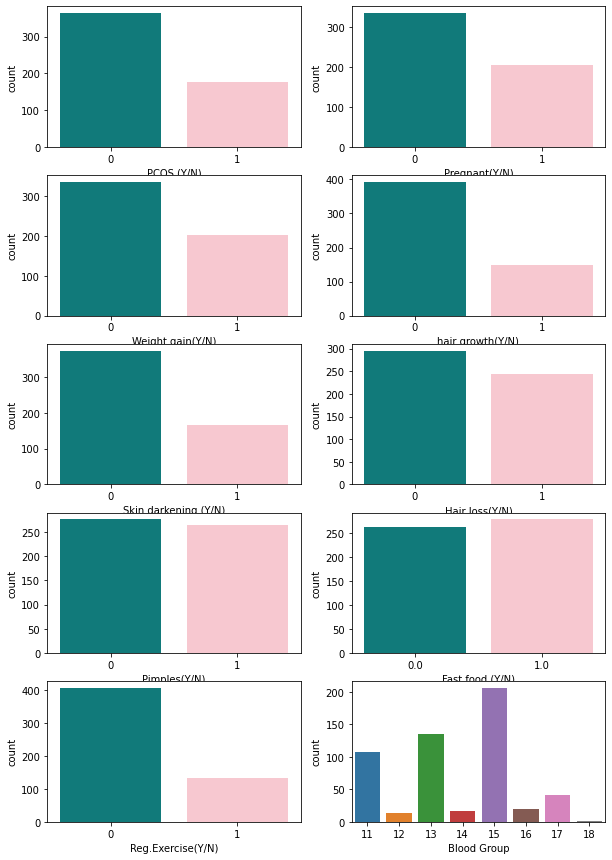

In [ ]:
plt.rcParams['figure.figsize'] = [10, 15]
colors = ['darkcyan', 'pink']
fig, axes = plt.subplots(5, 2)
sns.countplot(x ='PCOS (Y/N)', data = data, palette = colors, ax=axes[0,0])
sns.countplot(x ='Pregnant(Y/N)', data = data, palette = colors, ax=axes[0,1])
sns.countplot(x ='Weight gain(Y/N)', data = data, palette = colors,ax=axes[1,0])
sns.countplot(x ='hair growth(Y/N)', data = data, palette = colors,ax=axes[1,1])
sns.countplot(x ='Skin darkening (Y/N)', data = data, palette = colors,ax=axes[2,0])
sns.countplot(x ='Hair loss(Y/N)', data = data, palette = colors,ax=axes[2,1])
sns.countplot(x ='Pimples(Y/N)', data = data, palette = colors,ax=axes[3,0])
sns.countplot(x ='Fast food (Y/N)', data = data, palette = colors,ax=axes[3,1])
sns.countplot(x ='Reg.Exercise(Y/N)', data = data, palette = colors,ax=axes[4,0])
sns.countplot(x ='Blood Group', data = data, ax=axes[4,1])

fig.show()

### Multivariate Analysis

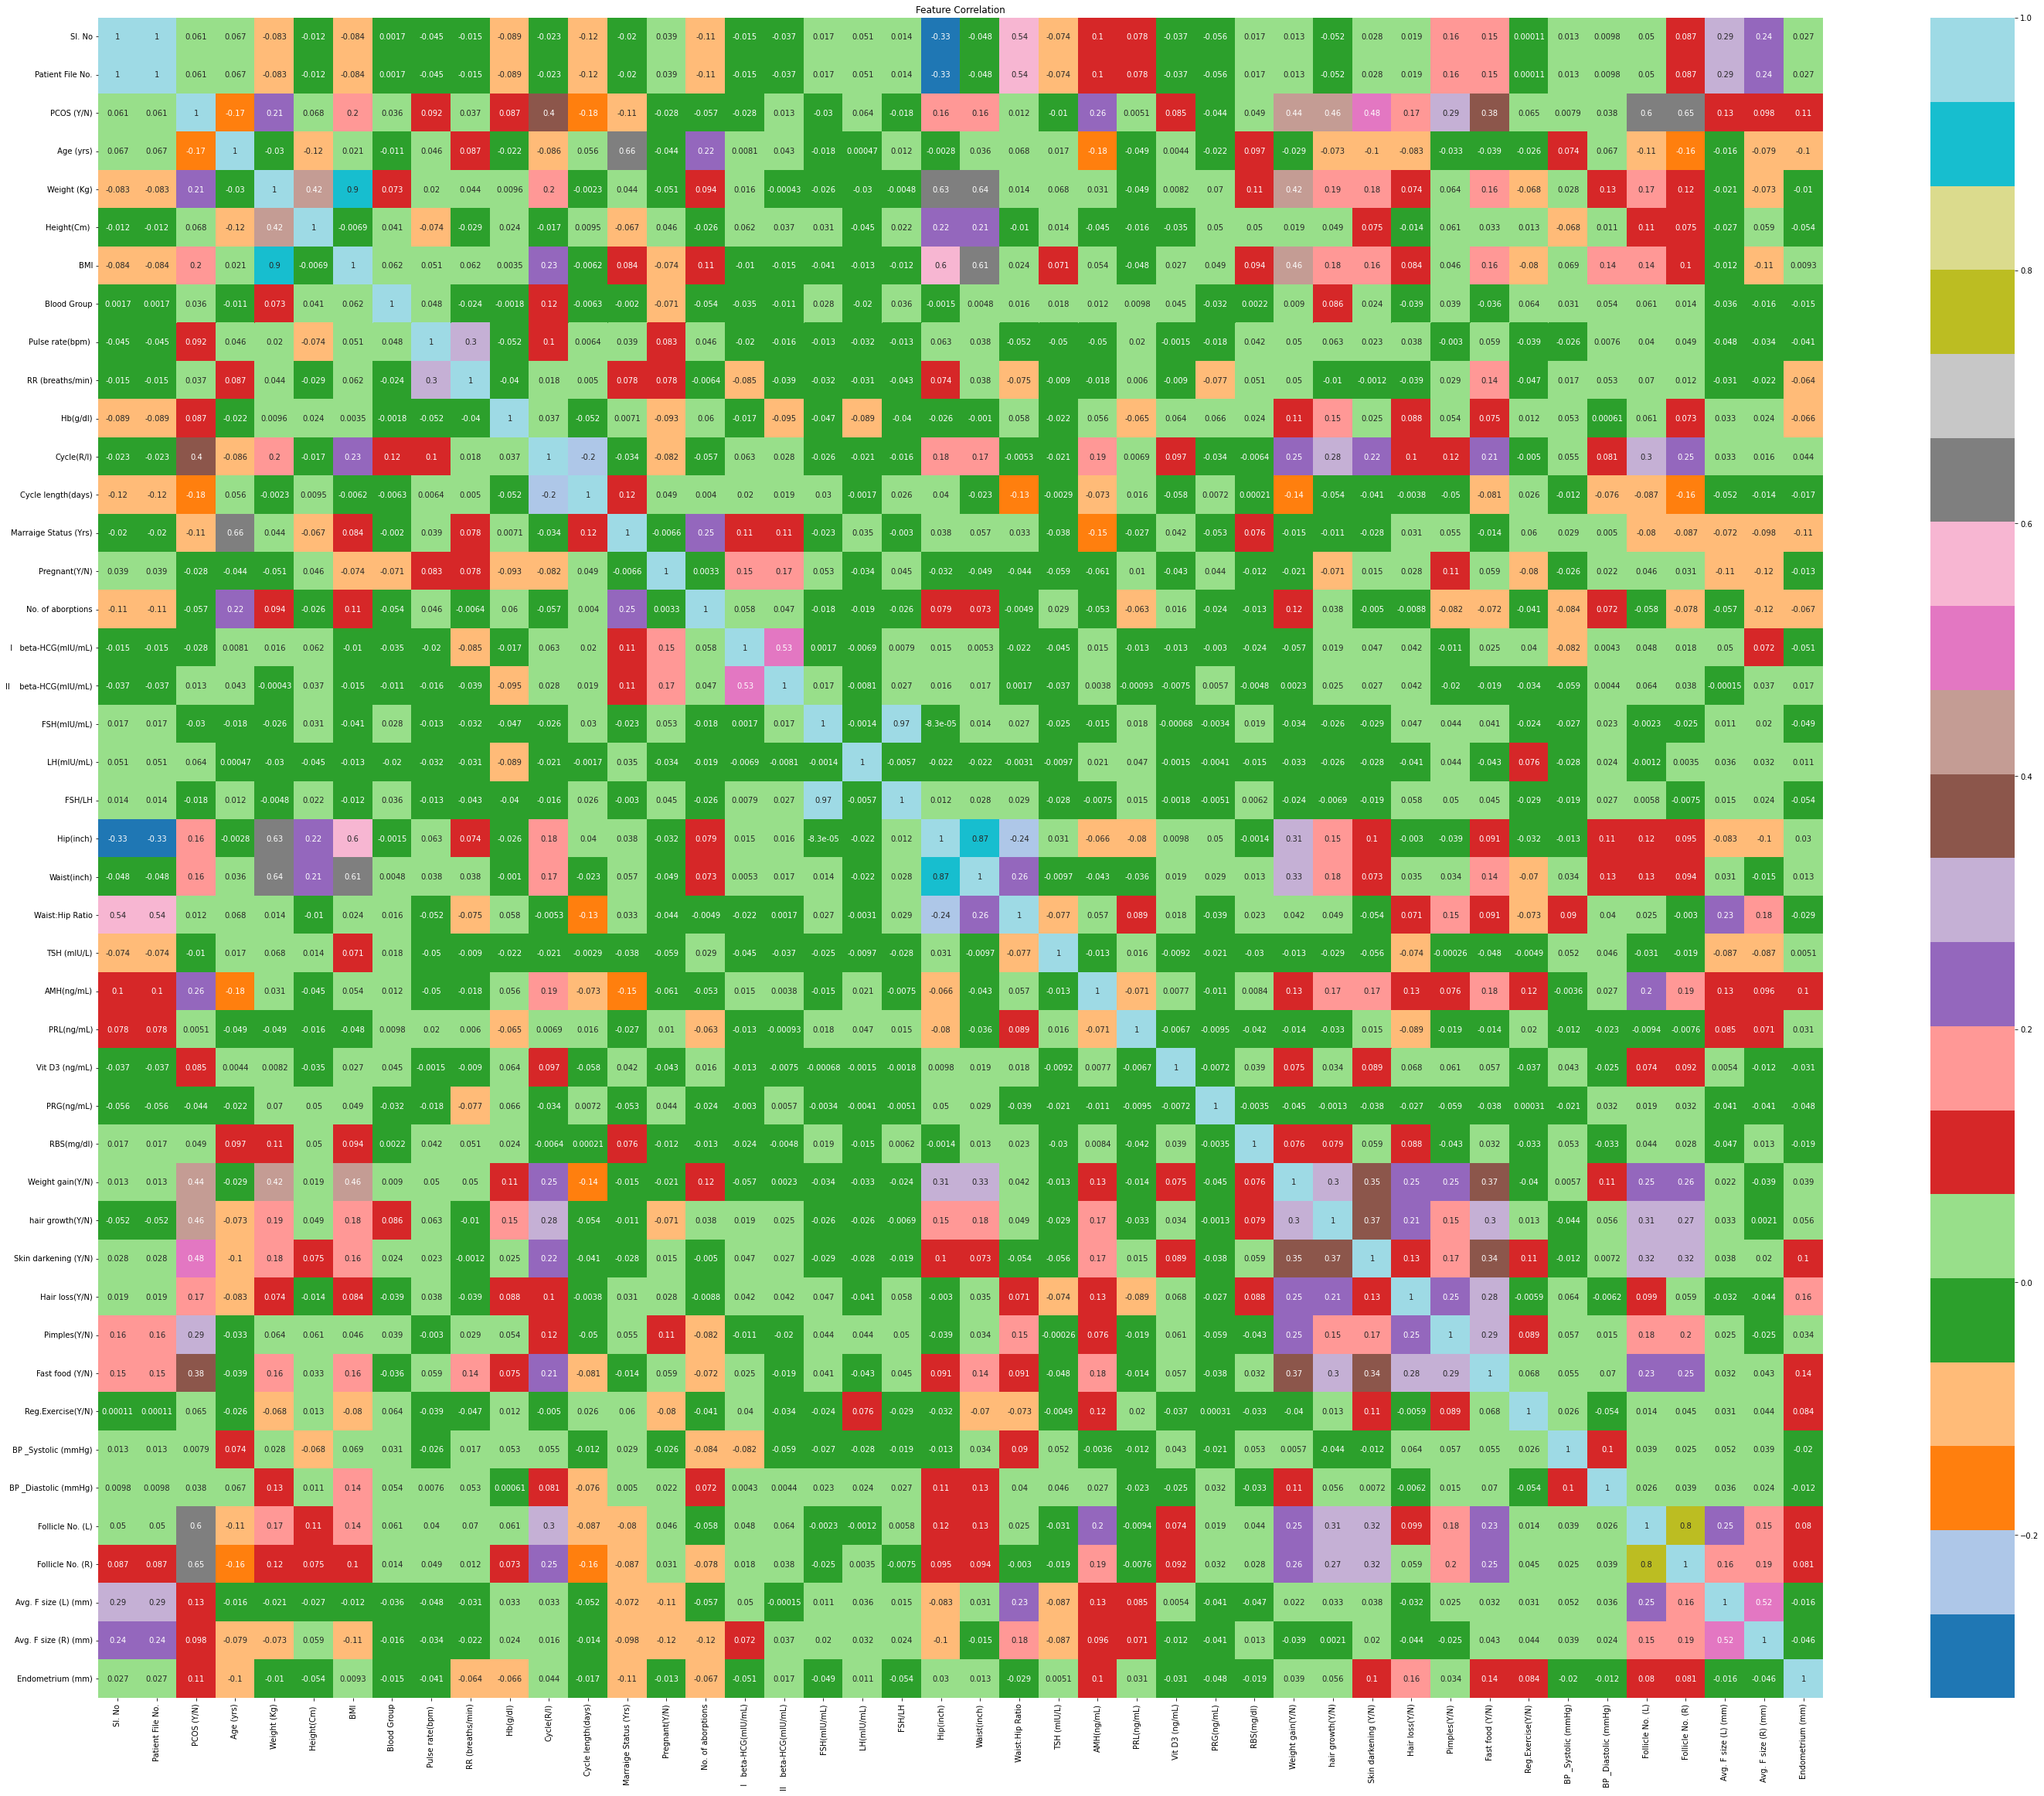

In [ ]:
corr_matrix = data.corr()
plt.subplots(figsize=(50,40))
sns.heatmap(corr_matrix, cmap = 'tab20', annot = True);
plt.title('Feature Correlation')
plt.show()

In [ ]:
corr_matrix['PCOS (Y/N)'].sort_values()

Cycle length(days)       -0.178480
 Age (yrs)               -0.168513
Marraige Status (Yrs)    -0.113056
No. of aborptions        -0.057158
PRG(ng/mL)               -0.043834
FSH(mIU/mL)              -0.030319
  I   beta-HCG(mIU/mL)   -0.027617
Pregnant(Y/N)            -0.027565
FSH/LH                   -0.018336
TSH (mIU/L)              -0.010140
PRL(ng/mL)                0.005143
BP _Systolic (mmHg)       0.007942
Waist:Hip Ratio           0.012386
II    beta-HCG(mIU/mL)    0.012760
Blood Group               0.036433
RR (breaths/min)          0.036928
BP _Diastolic (mmHg)      0.038032
RBS(mg/dl)                0.048922
Patient File No.          0.060998
Sl. No                    0.060998
LH(mIU/mL)                0.063879
Reg.Exercise(Y/N)         0.065337
Height(Cm)                0.068254
Vit D3 (ng/mL)            0.085494
Hb(g/dl)                  0.087170
Pulse rate(bpm)           0.091821
Avg. F size (R) (mm)      0.097690
Endometrium (mm)          0.106648
Avg. F size (L) (mm)

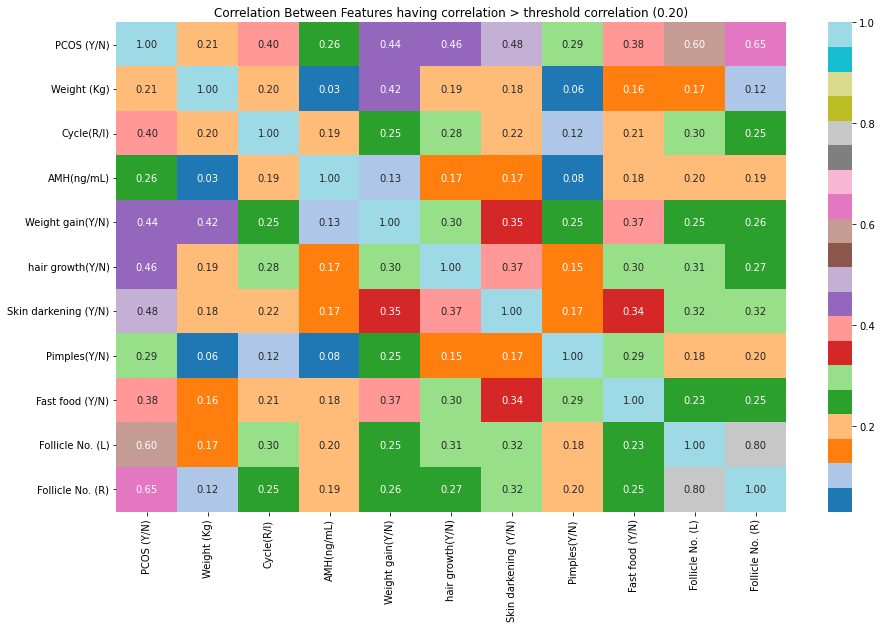

In [ ]:
#Analysing Important Features by choosing a threshold correlation
threshold = 0.20 
thresh = np.abs(corr_matrix['PCOS (Y/N)']) > threshold 
corr_features = corr_matrix.columns[thresh].tolist()
plt.subplots(figsize=(15,9))
sns.heatmap(data[corr_features].corr(), cmap= 'tab20', annot = True, fmt = ".2f")
plt.title('Correlation Between Features having correlation > threshold correlation (0.20)')
plt.show()

In [ ]:
X = data.drop(labels = ['PCOS (Y/N)', 'Sl. No','Patient File No.'],axis = 1)
y = data['PCOS (Y/N)']

## Splitting Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

In [ ]:
y_train

473    0
340    1
205    1
446    0
471    1
      ..
70     0
277    1
9      0
359    0
192    0
Name: PCOS (Y/N), Length: 432, dtype: int64

In [ ]:
X_train.head()

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
473,39,50.0,154.0,21.10000,15,78,22,12.1,2,5,16.0,0,0,1.97,1.99,3.80,2.00,1.900000,34,30,0.882353,4.35,4.13,14.13,23.70,0.25,100.0,0,0,0,0,0,0.0,0,120,80,5,7,19.0,20.0,5.0
340,26,60.0,152.0,26.00000,13,78,22,12.5,4,2,5.0,1,0,161.77,161.77,6.83,4.62,1.478355,40,36,0.900000,2.39,5.90,34.20,38.60,0.30,76.0,1,1,0,0,1,1.0,0,100,80,10,15,14.0,11.0,10.0
205,28,62.0,160.0,24.21875,15,73,18,12.0,4,5,7.0,0,0,2.10,1.99,3.44,0.77,4.467532,39,35,0.897436,0.75,5.25,23.12,43.68,0.32,140.0,1,1,1,0,1,1.0,1,110,80,15,18,15.0,19.0,8.0
446,29,63.0,162.0,24.00000,11,72,18,13.2,2,5,11.0,0,0,30004.00,475.04,1.99,1.61,1.236025,39,37,0.948718,1.77,5.96,21.95,22.70,0.46,95.0,0,1,1,0,0,1.0,0,110,80,6,7,18.0,19.0,5.9
471,31,50.0,152.0,21.60000,13,80,20,11.0,2,5,7.0,0,0,381.90,1.99,6.21,1.00,6.210000,36,34,0.944444,1.75,0.99,32.06,18.50,0.25,90.0,0,0,0,1,0,1.0,0,110,70,5,14,15.0,20.0,7.5


In [ ]:
X_test.head()

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of aborptions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
71,29,61.0,151.0,26.753213,13,74,20,10.0,2,5,9.0,0,0,15.00,1.99,6.49,0.99,6.555556,42,35,0.833333,1.66,2.58,41.63,38.44,1.22,92.0,0,0,0,0,0,0.0,0,120,70,5,6,12.0,6.0,6.0
392,27,45.0,158.0,18.000000,14,72,20,11.2,2,5,8.0,1,0,187.79,187.79,5.40,3.07,1.758958,36,32,0.888889,6.75,9.00,40.43,23.10,0.46,100.0,0,0,1,0,0,1.0,1,120,80,10,11,15.0,13.0,10.3
378,23,50.0,155.0,20.800000,15,72,18,10.8,4,6,3.0,0,0,2.00,2.00,9.59,5.98,1.603679,37,34,0.918919,3.63,2.90,30.85,21.10,0.75,92.0,0,0,0,1,1,0.0,0,110,70,3,5,18.0,18.0,11.2
365,38,77.9,161.0,30.100000,15,72,24,11.1,2,5,2.0,0,0,1.99,1.99,4.32,1.35,3.200000,42,37,0.880952,1.12,2.80,19.20,20.50,0.34,100.0,1,1,0,0,1,1.0,0,140,100,2,2,15.0,14.0,8.5
140,36,51.0,150.0,22.666667,13,72,18,10.2,2,5,8.0,0,0,3.41,57.08,7.92,1.03,7.689320,37,30,0.810811,4.04,2.10,27.85,26.50,0.50,92.0,1,0,1,0,0,0.0,1,110,80,3,2,9.0,18.0,9.0


## Building Random Forest Classification Model

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
#Cross Validation Score
rfc_cv_score = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_acc = rfc_cv_score.mean()*100
print(f"Test Accuracy: {rfc_acc : .3f} %")

Test Accuracy:  89.604 %


In [ ]:
""" 
  Testing KNN model - Proves to be lesser in accuracy that RandomForestClassifier
"""
"""
from sklearn.preprocessing import StandardScaler
X_train_knn = X_train.copy()
X_test_knn = X_test.copy()
sc = StandardScaler()
X_train_knn = sc.fit_transform(X_train_knn)
X_test_knn = sc.fit_transform(X_test_knn)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_knn, y_train)

pred_knn = knn.predict(X_test_knn)
knn_cv_score = cross_val_score(estimator = knn, X = X_train_knn, y = y_train, cv = 10)
knn_acc = knn_cv_score.mean()*100
print(knn_acc)

"""

'\nfrom sklearn.preprocessing import StandardScaler\n\nX_train_knn = X_train.copy()\nX_test_knn = X_test.copy()\nsc = StandardScaler()\nX_train_knn = sc.fit_transform(X_train_knn)\nX_test_knn = sc.fit_transform(X_test_knn)\n\nknn = KNeighborsClassifier()\nknn.fit(X_train_knn, y_train)\n\npred_knn = knn.predict(X_test_knn)\nknn_cv_score = cross_val_score(estimator = knn, X = X_train_knn, y = y_train, cv = 10)\nknn_acc = knn_cv_score.mean()*100\nprint(knn_acc)\n\n'

### Hyperparameter Optimization

In [ ]:
# No. of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 600, num = 10)]
# No. of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum no. of levels in tree
max_depth = [2,3,4,5,6,7,8,9,10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
#Creating the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [200, 244, 288, 333, 377, 422, 466, 511, 555, 600], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'bootstrap': [True, False]}


In [ ]:
#RandomSearch CV analysis
rf_RandomGrid = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = param_grid, cv = 10, verbose = 2, n_jobs = 4)
rf_RandomGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   26.6s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   57.3s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [ ]:
#Most suitable values of parameters
rf_RandomGrid.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 422}

In [ ]:
#Fitting RandomForestClassifier with hypertuned parameters
hypertuned_rfc = RandomForestClassifier(**rf_RandomGrid.best_params_)
hypertuned_rfc.fit(X_train, y_train)
#Predictions
y_pred = hypertuned_rfc.predict(X_test)

## Results

In [ ]:
#RandomSearchCV Score
hypertuned_rfc_train_acc = rf_RandomGrid.score(X_train,y_train)
hypertuned_rfc_test_acc = rf_RandomGrid.score(X_test,y_test)
print(f"Training Accuracy: {hypertuned_rfc_train_acc * 100 : .3f} %")
print(f"Test Accuracy: {hypertuned_rfc_test_acc * 100 : .3f} %")

Training Accuracy:  99.769 %
Test Accuracy:  91.743 %


In [ ]:
#Classification Report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        70
           1       0.94      0.74      0.83        39

    accuracy                           0.89       109
   macro avg       0.90      0.86      0.87       109
weighted avg       0.89      0.89      0.89       109



Text(0.5, 1.0, 'Confusion Matrix')

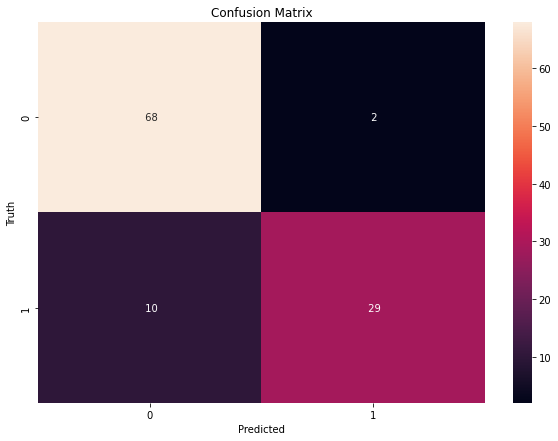

In [ ]:
#Confusion Matrix
plt.subplots(figsize = (10, 7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt =' d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')